In [1]:
#import libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#%matplotlib inline tells the notebook to display our plots inside the notebook, instead of in a separate screen.

from sklearn.linear_model import LinearRegression

    First, we imported the Pandas library. We also gave it the alias of pd. This means we can evoke the library with pd. You’ll see this in action shortly.
    
    Next, we imported the pyplot module from the matplotlib library. Matplotlib is the main plotting library for Python. There’s no need to bring in the entire library, so we just imported a single module. Again, we gave it an alias of plt.

    %matplotlib inline command? That’s Jupyter Notebook specific. It simply tells the notebook to display our plots inside the notebook, instead of in a separate screen.

    Finally we imported a basic linear regression algorithm from scikit-learn. Scikit-learn has a buffet of algorithms to choose from

Next, let’s import a dataset. Pandas has a suite of IO tools that allow you to read and write data. You can work with formats such as CSV, JSON, Excel, SQL databases, or even raw text files, More info on IO tools at https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [2]:
#read the excel file using pandas
df = pd.read_excel(r'ENB2012_data.xlsx')

To see what’s inside, just run this code in your notebook (it displays the first 5 observations from the dataframe):

In [3]:
#now see the contents of the file
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


(array([128., 128.,  64., 128.,  64.,  64.,  64.,  64.,   0.,  64.]),
 array([0.62 , 0.656, 0.692, 0.728, 0.764, 0.8  , 0.836, 0.872, 0.908,
        0.944, 0.98 ]),
 <a list of 10 Patch objects>)

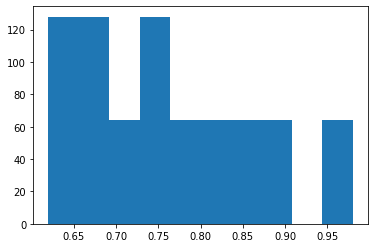

In [4]:
plt.hist(df.X1)

As you’ve probably guessed, plt.hist() produces a histogram.

In general, these types of functions will have different parameters that you can pass into them. Those parameters control things like the color scheme, the number of bins used, the axes, and so on.

There’s no need to memorize all of the parameters. Instead, get in the habit of checking the documentation page for available options. For example, the documentation page of plt.hist() indicates that you can change the number of bins in the histogram: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

let’s at least check for missing values. You can do so with just one line of code

In [12]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Let’s unpack that:

    df is where we stored the data. It’s called a “dataframe,” and it’s also a Python object, like the variables.
    
    .isnull() is called a method, which is just a fancy term for a function attached to an object. This method looks through our entire dataframe and labels any cell with a missing value as True. (Tip: Try running df.head().isnull() and see what you get!)
    
    Finally, .sum() is a method that sums all of the True values across each column. Well… technically, it sums any number, while treating True as 1 and False as 0.


In [13]:
df = pd.get_dummies(df, columns=['X6', 'X8'])

Feature engineering is typically where data scientists spend the most time. It’s where you can use “domain knowledge” to create new input features (i.e. variables) for your models, which can drastically improve their performance.

Let’s start with a low-hanging fruit: creating dummy variables.

Typically, you’ll have two types of features: numerical and categorical…

    Numerical ones are pretty self-explanatory… For example, “number of years of education” would be a numerical feature.
    
    Categorical features are those that have classes instead of numeric values…. 

A problem arises when categorical features are not ordinal. In fact, we have this problem in our current dataset.

If you remember from its data dictionary, features X6 (Orientation) and X8 (Glazing Area Distribution) are actually categorical. For example, X6 has four possible values:
Numerical encoding of categorical feature
Python
1
2
3
4
	
2 == 'north',
3 == 'east',
4 == 'south',
5 == 'west'

However, in the current way it’s encoded (i.e. as four integers), an algorithm will interpret “east” as “1 more than north” and “west” as “2 times the value east.”

That doesn’t make sense, right?

Therefore, we should create dummy variables for X6 and X8. These are brand new input features that only take the value of 0 or 1. You’d create one dummy per unique class for each feature.

So for X6, we’d create four variables—X6_2, X6_3, X6_4, and X6_5—that represent its four unique classes. 

In [14]:
df.head()

,X1,X2,X3,X4,X5,X7,Y1,Y2,X6_2,X6_3,X6_4,X6_5,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,1,0,0,0,1,0,0,0,0,0


 let’s split our dataset into separate objects for our input features (X) and the target variable (y). The target variable is simply what we wish to predict with our model.

Let’s predict “Y1,” a building’s “Heating Load.”

In [16]:
y=df.Y1

X=df.drop(['Y1', 'Y2'], axis=1)

In the first line of code, we’re copying Y1 from the dataframe into a separate y object. Then, in the second line of code, we’re copying all of the variables except Y1 and Y2 into the X object.

.drop() is another dataframe method, and it has two important parameters:

    The variables to drop… (e.g. ['Y1', 'Y2'])
    Whether to drop from the index ( axis=0) or the columns ( axis=1)


In [18]:
model = LinearRegression()

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

First, we initialize a model instance. Think of this as a single “version” of the model. For example, if you wanted to train a separate model and compare them, you can initialize a separate instance (e.g. model_2 = LinearRegression()).

Then, we call the .fit() method and pass the input features (X) and target variable (y) as parameters.

And that’s it!

In [19]:
from sklearn.metrics import r2_score

y_hat = model.predict(X)
r2_score(y_hat, y)

0.9178571159072202

As mentioned earlier, we’ve just scratched the surface. Even so, hopefully you’ve seen how easy it is to just get started.

And that’s the key!

Just get started, and don’t overthink it. Data science has a lot of moving pieces, so just take it one step at a time.

From here, there are three routes you can go for next steps. You’ll want to do all three of them eventually, but you can take them in any order.

Route #1: Get More Practice

Strike while the iron is hot, and keep practicing with tutorials like:

    Machine Learning with Scikit-Learn
    Data Wrangling with Pandas
    Data Visualization with Seaborn

Route #2: Solidify Python Fundamentals

Shore up programming fundamentals and your Python skills with our Self-Study Guide to Learning Python for Data Science. 

Route #3: Learn Essential Theory

Learn more about popular algorithms and essential concepts:

    Machine Learning Algorithms: Strengths and Weaknesses
    Overfitting in Machine Learning: What It Is and How to Prevent It
    The 5 Levels of Machine Learning Iteration

